# OpenPIV tutorial 2


Demonstrates the use of the multiprocessing run

In [7]:
from openpiv import tools, scaling, pyprocess, validation, filters
import os
import numpy as np

In [8]:

def func( args ):
    """A function to process each image pair."""

    # this line is REQUIRED for multiprocessing to work
    # always use it in your custom function

    file_a, file_b, counter = args


    #####################
    # Here goes you code
    #####################

    # read images into numpy arrays
    frame_a  = tools.imread( os.path.join(path,file_a) )
    frame_b  = tools.imread( os.path.join(path,file_b) )

    frame_a = (frame_a*1024).astype(np.int32)
    frame_b = (frame_b*1024).astype(np.int32)


    # process image pair with extended search area piv algorithm.
    u, v, sig2noise = pyprocess.extended_search_area_piv( frame_a, frame_b, \
        window_size=64, overlap=32, dt=0.02, search_area_size=128, sig2noise_method='peak2peak')
    mask = validation.sig2noise_val( sig2noise, threshold = 1.5 )
    u, v = filters.replace_outliers( u, v, mask, method='localmean', max_iter=10, kernel_size=2)
    # get window centers coordinates
    x, y = pyprocess.get_coordinates( image_size=frame_a.shape, search_area_size=128, overlap=32 )
    # save to a file
    tools.save(x, y, u, v, mask, 'test2_%03d.txt' % counter)
    tools.display_vector_field('test2_%03d.txt' % counter)


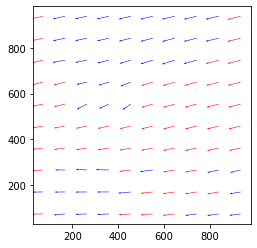

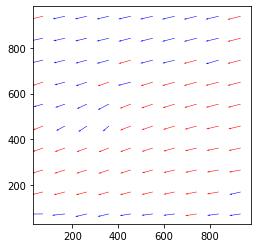

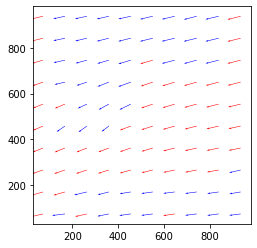

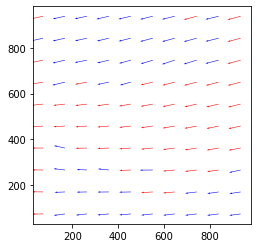

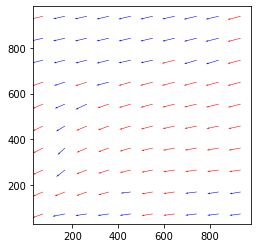

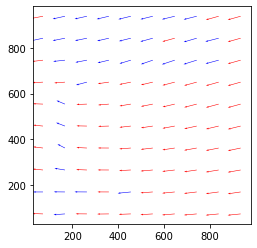

In [9]:

path = '../test2/'
task = tools.Multiprocesser( data_dir = path, pattern_a='2image_*0.tif', pattern_b='2image_*1.tif' )
task.run( func = func, n_cpus=1 )